In [1]:
import CMF
import PyPlot; plt = PyPlot;
import Random; Random.seed!(0);
import JLD

## Load datasets

In [26]:
K, L = 10, 20
PATH = "/home/anthony/cmf_data/"

datasets = Dict(
    :maze => CMF.maze(
        path=string(PATH, "Achilles_10252013_sessInfo.mat"),
        epoch=nothing,
        end_time=-1
    ),
    :piano => CMF.piano(),
    :drums => CMF.drums_mix(),
    :voice => CMF.female_voices()
)
runtimes = Dict(
    :maze => 8*60,
    :piano => 30,  # 30
    :drums => 30,  # 30
    :voice => 30  # 30
);

## Fit data

In [27]:
alg_list = [:hals, :mult, :anls]

results = Dict()
for key in keys(datasets)
    results[key] = Dict()
    println(string("Fitting ", key))
    
    for alg in alg_list
        results[key][alg] = CMF.fit_cnmf(
            datasets[key], alg=alg,
            K=K, L=L, max_time=runtimes[key], max_itr=Inf
        )
    end
end

In [28]:
JLD.save("./experimental_comparison.jld", "results", results)

## Plot loss histories

In [31]:
results = JLD.load("./experimental_comparison.jld", "results");

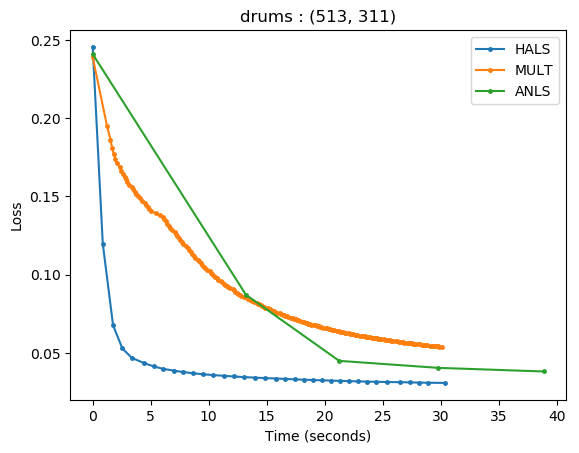

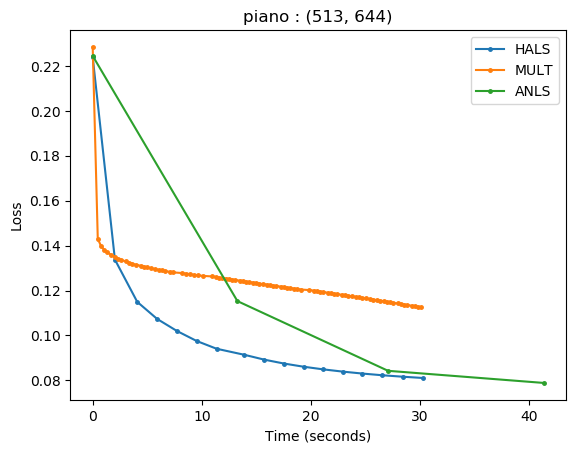

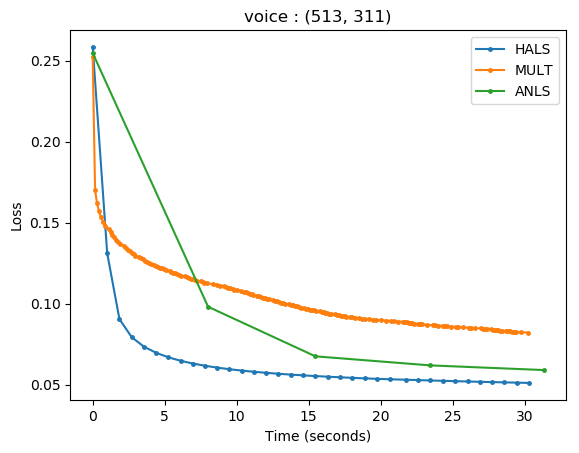

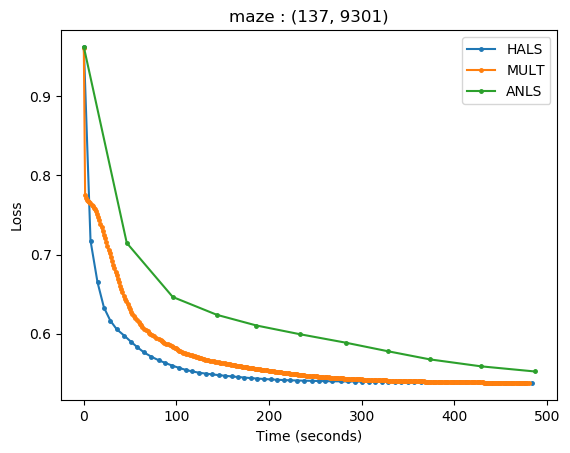

In [32]:
labels = Dict(:hals => "HALS", :mult => "MULT", :anls => "ANLS")

for key in keys(datasets)
    plt.figure()
    for alg in alg_list
        r = results[key][alg]
        plt.plot(r.time_hist, r.loss_hist, marker=".", markersize=5,
            label=labels[alg])
    end
    plt.legend()
    plt.title(string(key, " : ", size(datasets[key])))
    plt.xlabel("Time (seconds)")
    plt.ylabel("Loss")
    plt.show()
end